[ 158.42721581]


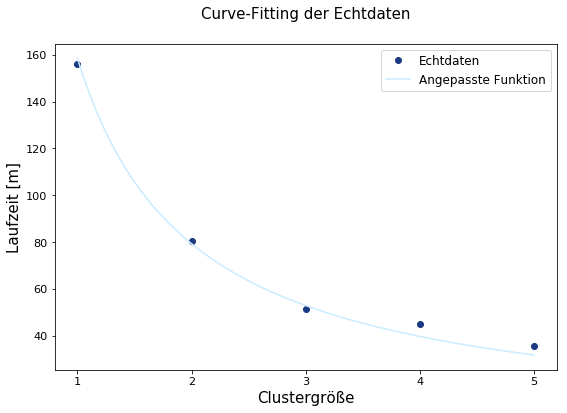

0.994570264189
[156.16666666666666, 80.549999999999997, 51.299999999999997, 45.083333333333336, 35.31666666666667]


In [53]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
colors = ["#2E1510","#5A3343","#5F6483","#399CA5","#64CF94","#E1F36F"]
df1 = pd.read_csv("results-cluster-size-1.csv")
df2 = pd.read_csv("results-cluster-size-2.csv")
df3 = pd.read_csv("results-cluster-size-3.csv")
df4 = pd.read_csv("results-cluster-size-4.csv")
df5 = pd.read_csv("results-cluster-size-5.csv")
#plt.rcParams['figure.figsize'] = [6, 6]
def getDurationM(pd):
    start = pd['start'].min()
    end = pd['end'].max()
    return (end - start) / 60

size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (9,6),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)


# idea: Skalierungsfaktor b für 60 Workflows abhängig von cluster
# konstante k + b für cluster größe 60
def func(x, b):
  return b/(x)

durations = [
    getDurationM(df1),
    getDurationM(df2),
    getDurationM(df3),
    getDurationM(df4),
    getDurationM(df5)
] 

x = numpy.array([1,2,3,4,5])
x_draw = numpy.linspace(1,5,50)
y = numpy.array(durations)
popt, pcov = curve_fit(func,  x,  y)
from matplotlib.ticker import MaxNLocator

print(popt)
#print(durations)
fig = plt.figure()
ax = fig.gca()
plt.plot(x, y, 'o', color='#1A3A82', label="Echtdaten")
plt.plot(x_draw, func(x_draw, *popt), '-', color= '#C9ECFF', label="Angepasste Funktion")
plt.xlabel('Clustergröße')
plt.ylabel('Laufzeit [m]')
plt.legend(title="")
plt.title("Curve-Fitting der Echtdaten")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.savefig('curve_fit.pdf')

plt.show()

# see https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
residuals = y- func(x, *popt)
ss_res = numpy.sum(residuals**2)
ss_tot = numpy.sum((y-numpy.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)
print(durations)
#print(func(5,151.185322, 4.6420363))